In [2]:
import pandas as pd

In [3]:
# ALL Cobnfederations
afc = pd.read_csv('./data/confederations/AFC.csv')
caf = pd.read_csv('./data/confederations/CAF.csv')
concacaf = pd.read_csv('./data/confederations/CONCACAF.csv')
conmebol = pd.read_csv('./data/confederations/CONMEBOL.csv')
ofc = pd.read_csv('./data/confederations/OFC.csv')
uefa = pd.read_csv('./data/confederations/UEFA.csv')

In [4]:
frames = [afc, caf, concacaf, conmebol, ofc, uefa]
confederations = pd.concat(frames)

confederations['IOC_member'] = confederations['IOC_member'].map(
                   {'Yes':True ,'No':False})

In [5]:
confederations

,code,name,founded,FIFA_affiliation,confederation_affiliation,regional,confederation,IOC_member
0,AUS,Australia,1961,1963.0,2006,AFF,AFC,True
1,BRU,Brunei Darussalam,1952,1972.0,1969,AFF,AFC,True
2,CAM,Cambodia,1933,1954.0,1954,AFF,AFC,True
3,LAO,Laos,1951,1952.0,1968,AFF,AFC,True
4,INA,Indonesia,1930,1952.0,1954,AFF,AFC,True
...,...,...,...,...,...,...,...,...
50,SWE,Sweden,1904,1904.0,1954,NaN,UEFA,True
51,SUI,Switzerland,1895,1904.0,1954,NaN,UEFA,True
52,TUR,Turkey,1923,1923.0,1962,NaN,UEFA,True
53,UKR,Ukraine,1991,1992.0,1992,NaN,UEFA,True


In [6]:
confederations.info(verbose=True)
confederations.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 54
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   code                       222 non-null    object 
 1   name                       222 non-null    object 
 2   founded                    222 non-null    int64  
 3   FIFA_affiliation           211 non-null    float64
 4   confederation_affiliation  222 non-null    int64  
 5   regional                   143 non-null    object 
 6   confederation              222 non-null    object 
 7   IOC_member                 222 non-null    bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 14.1+ KB


,founded,FIFA_affiliation,confederation_affiliation
count,222.000000,211.000000,222.000000
mean,1944.279279,1959.094787,1971.801802
std,30.676143,29.672988,20.669264
min,1863.000000,1904.000000,1916.000000
25%,1921.250000,1933.000000,1954.750000
50%,1945.000000,1963.000000,1966.000000
75%,1965.750000,1986.000000,1991.750000
max,2011.000000,2016.000000,2020.000000


In [7]:
confederations.to_csv('./data/confederations.csv', index=False)

### For this Dataset to work with the International Matches dataset we need to change a few names 

In [8]:
matches = pd.read_csv('./data/matches.csv')
matches.head()

,match_id,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [9]:
matches.info(verbose=True)
matches.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44164 entries, 0 to 44163
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   match_id    44164 non-null  int64  
 1   date        44164 non-null  object 
 2   home_team   44164 non-null  object 
 3   away_team   44164 non-null  object 
 4   home_score  44164 non-null  float64
 5   away_score  44164 non-null  float64
 6   tournament  44164 non-null  object 
 7   city        44164 non-null  object 
 8   country     44164 non-null  object 
 9   neutral     44164 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 3.1+ MB


,match_id,home_score,away_score
count,44164.000000,44164.000000,44164.000000
mean,22082.500023,1.739494,1.178109
std,12749.193020,1.746572,1.394421
min,1.000000,0.000000,0.000000
25%,11041.750000,1.000000,0.000000
50%,22082.500000,1.000000,1.000000
75%,33123.250000,2.000000,2.000000
max,44165.000000,31.000000,21.000000


In [10]:
countries_fifa_not_in_matches = list(set(confederations['name'].unique()) - set(matches['home_team'].unique()))
countries_fifa_not_in_matches

['China',
 'Korea Republic',
 'Kyrgyz Republic',
 'Reunion',
 'Chinese Taipei',
 'Sao Tome and Principe',
 'DPR Korea',
 'U.S. Virgin Islands']

In [11]:
# These can be easily edited to match the versions from International Matches

# first see which countries are in matches but not in confederations
countries_in_matches_not_in_confederations = list(set(matches['home_team'].unique()) - set(confederations['name'].unique()))

# Create series with all countries in matches and the number of matches
countries_list_matches = matches['home_team'].value_counts()

# Then filter the  list of matches using the countries that are in matches but not in confederation
print((countries_list_matches.loc[countries_in_matches_not_in_confederations]).sort_values(ascending=False).head(20))

# This way we see how we should reformat the countries from confederations

South Korea                     497
China PR                        344
Czechoslovakia                  231
Yugoslavia                      190
German DR                       132
North Korea                     126
Kyrgyzstan                       66
Vietnam Republic                 49
Jersey                           48
Réunion                          41
Catalonia                        39
Guernsey                         37
Taiwan                           34
Basque Country                   33
Greenland                        30
Ynys Môn                         29
Padania                          28
Brunei                           28
Åland Islands                    27
United States Virgin Islands     26
Name: home_team, dtype: int64


In [12]:
federations = confederations.copy()

In [13]:
federations['name'] = federations['name'].replace(countries_fifa_not_in_matches, ['United States Virgin Islands', 
                                                                                                  'Réunion', 
                                                                                                  'São Tomé and Príncipe', 
                                                                                                  'Kyrgyzstan','Taiwan', 
                                                                                                  'South Korea', 
                                                                                                  'North Korea', 
                                                                                                  'China PR'])


In [14]:
countries_fifa_not_in_matches_test = list(set(federations['name'].unique()) - set(matches['home_team'].unique()))
countries_fifa_not_in_matches_test

[]

In [15]:
federations

,code,name,founded,FIFA_affiliation,confederation_affiliation,regional,confederation,IOC_member
0,AUS,Australia,1961,1963.0,2006,AFF,AFC,True
1,BRU,Brunei Darussalam,1952,1972.0,1969,AFF,AFC,True
2,CAM,Cambodia,1933,1954.0,1954,AFF,AFC,True
3,LAO,Laos,1951,1952.0,1968,AFF,AFC,True
4,INA,Indonesia,1930,1952.0,1954,AFF,AFC,True
...,...,...,...,...,...,...,...,...
50,SWE,Sweden,1904,1904.0,1954,NaN,UEFA,True
51,SUI,Switzerland,1895,1904.0,1954,NaN,UEFA,True
52,TUR,Turkey,1923,1923.0,1962,NaN,UEFA,True
53,UKR,Ukraine,1991,1992.0,1992,NaN,UEFA,True


In [17]:
federations.to_csv('./data/federations.csv', index=False)

In [19]:
# Now check to see which countries remain in matches that are not part of fifa


# first see which countries are in matches but not in federations
countries_in_matches_not_in_federations = list(set(matches['home_team'].unique()) - set(federations['name'].unique()))

# Create series with all countries in matches and the number of matches
countries_list_matches_new = matches['home_team'].value_counts()

# Then filter the  list of matches using the countries that are in matches but not in federation
print((countries_list_matches_new.loc[countries_in_matches_not_in_federations]).sort_values(ascending=False).head(30))

# This way we see how we should reformat the countries from confederations

Czechoslovakia      231
Yugoslavia          190
German DR           132
Vietnam Republic     49
Jersey               48
Catalonia            39
Guernsey             37
Basque Country       33
Greenland            30
Ynys Môn             29
Padania              28
Brunei               28
Åland Islands        27
Isle of Wight        26
Northern Cyprus      22
Isle of Man          22
Shetland             22
Gotland              20
Abkhazia             18
Sápmi                18
Saare County         15
Iraqi Kurdistan      13
Frøya                12
Orkney               12
Andalusia            12
Rhodes               11
Menorca              11
Western Isles        11
Falkland Islands     11
Barawa               11
Name: home_team, dtype: int64


In [21]:
matches_after1950 = matches[matches['date'] > '1950-01-01']
matches_after1950

,match_id,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3077,3078,1950-01-24,Zambia,DR Congo,1.0,0.0,Friendly,Kitwe,Northern Rhodesia,False
3078,3079,1950-02-17,Egypt,Greece,2.0,0.0,Friendly,Cairo,Egypt,False
3079,3080,1950-02-26,Bolivia,Chile,2.0,0.0,Friendly,La Paz,Bolivia,False
3080,3081,1950-02-26,Croatia,Serbia,4.0,1.0,Friendly,Zagreb,Yugoslavia,False
3081,3082,1950-03-05,Italy,Belgium,3.0,1.0,Friendly,Bologna,Italy,False
...,...,...,...,...,...,...,...,...,...,...
44159,44160,2022-11-21,Senegal,Netherlands,0.0,2.0,FIFA World Cup,Doha,Qatar,True
44160,44161,2022-11-21,England,Iran,6.0,2.0,FIFA World Cup,Al Rayyan,Qatar,True
44161,44162,2022-11-21,United States,Wales,1.0,1.0,FIFA World Cup,Al Rayyan,Qatar,True
44162,44163,2022-11-22,Argentina,Saudi Arabia,1.0,2.0,FIFA World Cup,Lusail,Qatar,True


In [28]:
# Now check to see which countries remain in matches that are not part of fifa
# matches after 1950

# first see which countries are in matches but not in federations
countries_in_matches_not_in_federations = list(set(matches_after1950['home_team'].unique()) - set(federations['name'].unique()))

# Create series with all countries in matches and the number of matches
countries_list_matches_new = matches_after1950['home_team'].value_counts()

# Then filter the  list of matches using the countries that are in matches but not in federation
print((countries_list_matches_new.loc[countries_in_matches_not_in_federations]).sort_values(ascending=False).head(30))

# This way we see how we should reformat the countries from confederations

Czechoslovakia      157
Yugoslavia          140
German DR           132
Vietnam Republic     49
Jersey               48
Guernsey             37
Greenland            30
Ynys Môn             29
Basque Country       29
Padania              28
Brunei               28
Åland Islands        27
Isle of Wight        26
Catalonia            25
Northern Cyprus      22
Isle of Man          22
Shetland             22
Gotland              20
Abkhazia             18
Sápmi                18
Saare County         15
Iraqi Kurdistan      13
Frøya                12
Orkney               12
Menorca              11
Andalusia            11
Barawa               11
Falkland Islands     11
Western Isles        11
Rhodes               11
Name: home_team, dtype: int64


<AxesSubplot: >

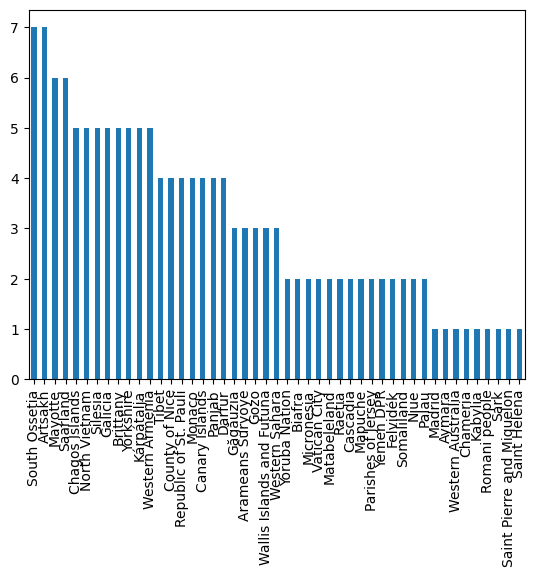

In [35]:
countries_list_matches_new.loc[countries_in_matches_not_in_federations].sort_values(ascending=False)[40:].plot(kind='bar')

In [36]:
len(countries_list_matches_new.loc[countries_in_matches_not_in_federations])

87